In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
# Function to load all PNG images from the specified folder
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            # Read the image in grayscale mode
            img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
    return images

In [3]:
# Function to plot images side by side for comparison
def plot_images(titles, images):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [4]:
# Load images from the folder
images = load_images('D:\PROJECTS\Version Control\SIH\IMAGES')

In [5]:
# Function to display the first 5 loaded images side by side
def display_images(images):
    plt.figure(figsize=(8, 8))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i], cmap='gray')  # Display image in grayscale
        plt.title(f'Image {i + 1}')
        plt.axis('off')  # Hide the axis
    plt.show()

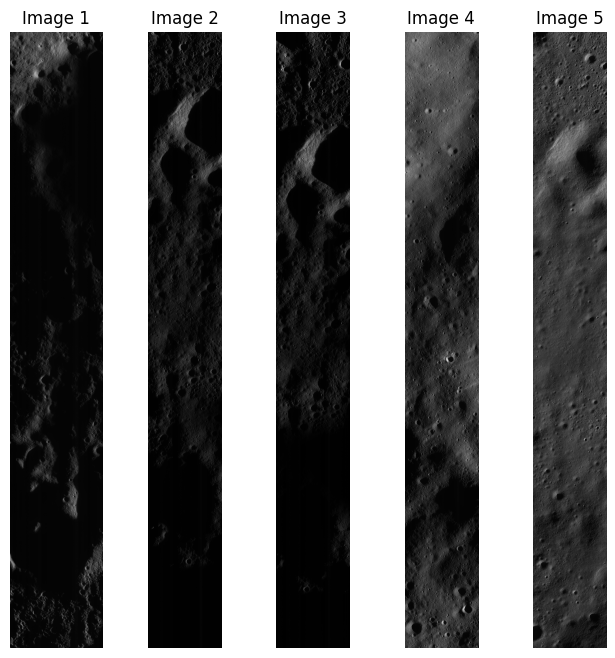

In [6]:
display_images(images)

In [9]:
#Checking the dimensions and bit depth
for img in images:
    assert img.dtype == 'uint8', "Image is not 8-bit"

In [10]:
# Processing each image

processed_images = []


for img in images:
    #Noise Reduction
    img_denoised = cv2.GaussianBlur(img, (5, 5), 0)

    #Contrast Enhancement using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_contrast_enhanced = clahe.apply(img_denoised)
    
    #Histogram Equalization (Enhancement)
    enhanced = cv2.equalizeHist(img_contrast_enhanced)

    #Edge Detection
    edges = cv2.Canny(enhanced, threshold1=50, threshold2=150)
    
    #Thresholding
    _, thresholded = cv2.threshold(enhanced, 60, 255, cv2.THRESH_BINARY)
    
    # Contour Detection
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    image_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color drawing
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)
    
    # Store the processed images
    processed_images.append({
        'original': img,
        'denoised': img_denoised,
        'enhanced': enhanced,
        'edges': edges,
        'thresholded': thresholded,
        'contours': image_with_contours
    })


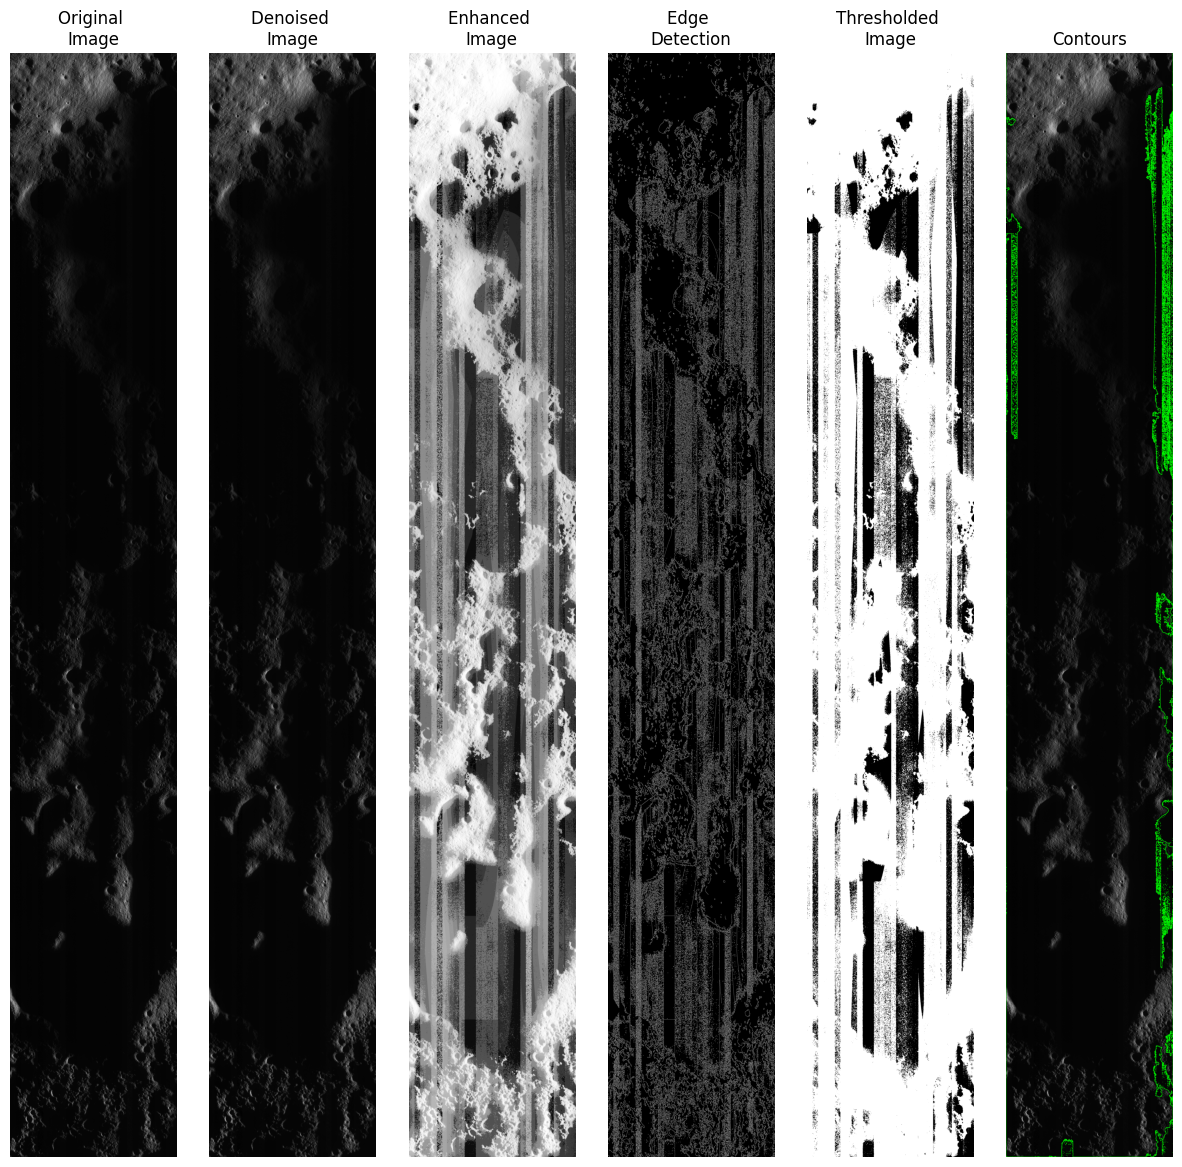

In [11]:
# Plot the processed results for comparison
plot_images(
    titles=['Original \nImage', 'Denoised \nImage', 'Enhanced \nImage', 'Edge \nDetection', 'Thresholded \nImage', 'Contours'],
    images=[
        processed_images[0]['original'],
        processed_images[0]['denoised'],
        processed_images[0]['enhanced'],        
        processed_images[0]['edges'],
        processed_images[0]['thresholded'],
        processed_images[0]['contours']
    ]
)

In [12]:
# Save the processed images
output_folder = 'preprocessed_images'
subfolders = ['original', 'enhanced', 'edges', 'thresholded', 'contours']

# Create subfolders
for subfolder in subfolders:
    os.makedirs(os.path.join(output_folder, subfolder), exist_ok=True)


In [13]:
# Save images to respective subfolders
for i, imgs in enumerate(processed_images):
    cv2.imwrite(os.path.join(output_folder, 'original', f'original_image_{i}.png'), imgs['original'])
    cv2.imwrite(os.path.join(output_folder, 'enhanced', f'enhanced_image_{i}.png'), imgs['enhanced'])
    cv2.imwrite(os.path.join(output_folder, 'edges', f'edges_image_{i}.png'), imgs['edges'])
    cv2.imwrite(os.path.join(output_folder, 'thresholded', f'thresholded_image_{i}.png'), imgs['thresholded'])
    cv2.imwrite(os.path.join(output_folder, 'contours', f'contours_image_{i}.png'), imgs['contours'])